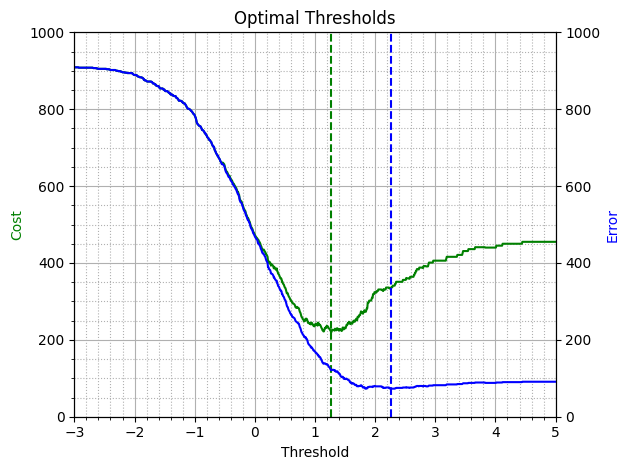

In [23]:
import numpy as np
import matplotlib.pyplot as plt

mu_0 = 0
mu_1 = 2
sigma = 1
pi = 0.1
l_10 = 5
l_01 = 1

n_samples = 1000

disease = np.random.rand(n_samples) < pi
test = np.random.normal(0, sigma, n_samples) + (mu_0 * (1 - disease) + mu_1 * disease)

threshold_min = mu_0 - 3 * sigma
threshold_max = mu_1 + 3 * sigma

threshold = np.linspace(threshold_min, threshold_max, 1000)
diagnosis = test[:, np.newaxis] > threshold[np.newaxis, :]

false_positives = np.sum(diagnosis & ~disease[:, np.newaxis], axis=0)
false_negatives = np.sum(~diagnosis & disease[:, np.newaxis], axis=0)
cost = false_negatives * l_10 + false_positives * l_01
error = false_positives + false_negatives

cost_optimal_threshold = threshold[np.argmin(cost)]
error_optimal_threshold = threshold[np.argmin(error)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(threshold, cost, 'g-')
ax2.plot(threshold, error, 'b-')
ax1.set_xlabel("Threshold")
ax1.set_xlim(threshold_min, threshold_max)
ax1.set_ylabel("Cost", color='g')
ax2.set_ylabel("Error", color='b')
ax1.set_ylim(0, n_samples)
ax2.set_ylim(0, n_samples)
ax1.axvline(cost_optimal_threshold, color='g', linestyle='--')
ax2.axvline(error_optimal_threshold, color='b', linestyle='--')
ax1.grid()
ax1.minorticks_on()
ax1.grid(which="minor", linestyle=":")
ax1.set_title("Optimal Thresholds")

plt.tight_layout()
plt.show()

$$a = b$$